In [27]:
import functions_new as func
import importlib
importlib.reload(func)

###########################################################################################################################################

import numpy as np
import matplotlib.pyplot as plt
import random as rd
from IPython.display import clear_output

"simulate_riot_stochastic" function test 

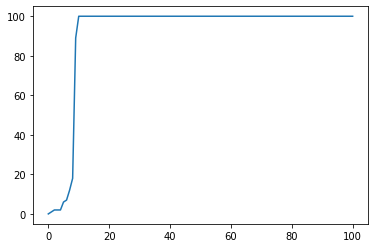

In [23]:
N = 100
average = 25
deviation = 2

agents = func.create_agents(N,average,deviation)

steps = 100

(progression, riot_size) = func.simulate_riot_stochastic(agents, steps)

plt.figure()
plt.plot(progression)
plt.ylim(-5,105)
plt.show()

"simulate_riot_stochastic_2" function test 

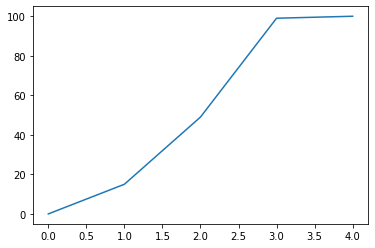

In [28]:
N = 100
average = 15
deviation = 12

agents = func.create_agents(N,average,deviation)

steps = 100

(progression, riot_size) = func.simulate_riot_stochastic_2(agents, steps)

plt.figure()
plt.plot(progression)
plt.ylim(-5,105)
plt.show()

Attempts to run the code with parallel processing

In [398]:
"""
def teste(tupla):
    
    simulacoes = tupla[0]
    desvio_padrao = tupla[1]
    passos = tupla[2]
    N = 100
    media = 25
    media_tamanhos = 0
    #print(simulacoes,desvio_padrao,passos)
    global mapa
    
    for j in range(int(simulacoes)):
        
        agentes = lim.cria_agentes(N,media,desvio_padrao)
        tamanho_final = lim.simula_greve_estocastico(agentes, int(passos))[1]
        media_tamanhos += tamanho_final
    
    media_tamanhos = media_tamanhos/simulacoes
    return media_tamanhos
    #mapa[passos-1][desvio_padrao] = media_tamanhos
"""

In [ ]:
"""
import concurrent.futures
import itertools
import time

if __name__ == '__main__':
    sigma_max = 40
    t_max = 10
    mapa = np.zeros((t_max,sigma_max))
    simulacoes = 10


    agentes = lim.cria_agentes(N,media,desvio_padrao)
    tamanho_final = lim.simula_greve_estocastico(agentes, passos)[1]

    desvios_padroes = np.array([])
    aux_desvios_padroes = np.arange(0,sigma_max)
    for i in range(sigma_max):
        for j in range(t_max):
            desvios_padroes = np.append(desvios_padroes, aux_desvios_padroes[i])

    passos_temporais = np.array([])
    aux_passos_temporais = np.arange(1,t_max+1)
    for i in range(sigma_max):
        passos_temporais = np.append(passos_temporais, aux_passos_temporais)

    aux = np.arange(0,sigma_max*t_max)
    array_simulacoes = np.full_like(aux,simulacoes)

    tuplas = np.zeros((sigma_max*t_max,3))
    for i in range(sigma_max*t_max):
        tuplas[i] = tuple([int(array_simulacoes[i]),int(desvios_padroes[i]),int(passos_temporais[i])])

    #print(tuplas)

    #print((desvios_padroes),(passos_temporais),(array_simulacoes))

    t = time.perf_counter()
    with concurrent.futures.ThreadPoolExecutor() as executor:
        mapa = list(executor.map(teste, tuplas))

    t_2 = time.perf_counter()
    #print(mapa)
    print(t_2 - t)


    #print(array_simulacoes)
    #print(desvios_padroes)
    #print(passos_temporais)
    #print(len(array_simulacoes), len(desvios_padroes), len(passos_temporais))

    t = time.perf_counter()
    mapa = list(map(teste, tuplas))
    t_2 = time.perf_counter()
    print("nabla")
    print(mapa)
    print(t_2 - t)
"""

Heat map of the function "simulate_riot_stochastic", given that the x axis corresponds to the number of time steps per simulation and the y axis corresponds to it's standard deviation value

In [ ]:
N = 100
average = 25
deviations = np.arange(0,100)  # standard deviations of the normal distribution
simulations = 100                    # number of simulations per standard deviation value
averages = np.array([])
steps = np.arange(1,26)

heat_map = np.zeros((25,100))

for k in steps:
    clear_output(wait=True)
    print(str("%.2f" % ((k-1)/25*100)+"%"), end="\n")
    
    for i in deviations:
        average_size = 0

        for j in range(simulations):
            agents = func.create_agents(N,average,i)
            size = func.simulate_riot_stochastic(agents, k)[1]
            average_size += size

        average_size = average_size/simulations
        averages = np.append(averages, average_size)
        heat_map[k-1][i] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média do tamanho da greve - y = passos temporais e x = desvio padrao")
plt.show()

Heat map of the function "simulate_riot_stochastic", given that the x axis corresponds to the threshold distribution average value and the y axis corresponds to it's standard deviation value

In [ ]:
N = 100
averages_sample = np.arange(0,100)
deviations = np.arange(0,100)         # standard deviations of the normal distribution
simulations = 100                     # number of simulations per standard deviation value
steps = 100

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (k)+"%"), end="\n")
    
    for i in deviations:
        average_size = 0

        for j in range(simulations):
            agents = func.create_agents(N,k,i)
            size = func.simulate_riot_stochastic(agents, steps)[1]
            average_size += size

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Estocástico")
plt.show()

Heat map of the function "simulate_riot_stochastic_2", given that the x axis corresponds to the threshold distribution average value and the y axis corresponds to it's standard deviation value

In [32]:
N = 100
averages_sample = np.arange(0,100)
deviations = np.arange(0,100)      # standard deviations of the normal distribution
simulations = 100                    # number of simulations per standard deviation value
steps = 100

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (k)+"%"), end="\n")
    
    for i in deviations:
        average_size = 0

        for j in range(simulations):
            agents = func.create_agents(N,k,i)
            size = func.simulate_riot_stochastic_2(agents, steps)[1]
            average_size += size

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Estocástico")
plt.show()

2.00%


KeyboardInterrupt: 

Reload my library

In [33]:
importlib.reload(func)

<module 'functions_new' from 'D:\\UFMG\\8° Período\\IC\\Modelo de Limiares\\Modelo Novo\\functions_new.py'>

Probability distributions of the chances of an agent enter or exit a riot. P(enter) = 1 - P(exit)

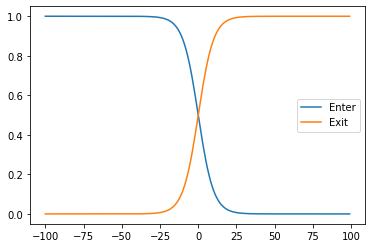

In [34]:
x = np.arange(-100,100)
m = 0.2

plt.figure()
plt.plot(x,1 / (1 + np.exp( m * x ) ),label = "Enter")
plt.plot(x,1 / (1 + np.exp( -m * x ) ),label = "Exit")
#plt.plot(x, 1 - 1 / (1 + np.exp( -m * x ) ),label = "1 - P(Sair) = P(Entrar)")
plt.legend()
plt.show()

"simulate_riot_stochastic_exit" function test 

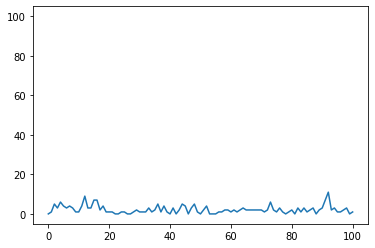

In [47]:
N = 100
average = 30
deviation = 12

agents = func.create_agents(N,average,deviation)

steps = 100

(progression, size) = func.simulate_riot_stochastic_exit(agents, steps)

plt.figure()
plt.plot(progression)
plt.ylim(-5,105)
plt.show()

Heat map of the function "simulate_riot_stochastic_exit", given that the x axis corresponds to the threshold distribution average value and the y axis corresponds to it's standard deviation value

99.00%


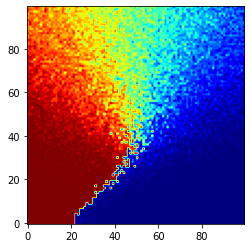

In [48]:
N = 100
average_max = 100
deviation_max = 100
averages_sample = np.arange(0,average_max)# average value of the normal distribution
deviations = np.arange(0,deviation_max)  # standard deviations of the normal distribution
simulations = 1                           # number of simulations per standard deviation value
steps = 100

heat_map = np.zeros((average_max,deviation_max))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (k/average_max * 100)+"%"), end="\n")
    
    for i in deviations:
        average_size = 0

        for j in range(simulations):
            agents = func.create_agents(N,k,i)
            size = func.simulate_riot_stochastic_exit(agents, steps)[1]
            average_size += size

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Estocástico_2_100simulacoes")
plt.show()

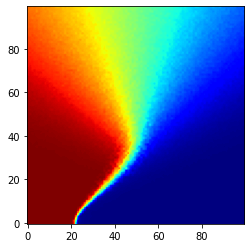

In [3]:
plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Estocástico_saida")
plt.show()